In [1]:
import yfinance as yf
import numpy as np

In [2]:
from datetime import datetime
end= datetime.now()
start= '2014-01-01'

In [3]:
stock="BTC-USD"
bitcoin=yf.download(stock,start,end)
bitcoin

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...
2025-01-18,104408.070312,104913.203125,102226.617188,104124.953125,50445655726
2025-01-19,101089.609375,106299.796875,99570.531250,104411.289062,76789928525


In [4]:
print(bitcoin.columns)

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


In [5]:
bitcoin.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3781.000000,3781.000000,3781.000000,3781.000000,3.781000e+03
mean,20045.194268,20469.877600,19551.829194,20018.985258,1.879145e+10
std,22866.499885,23332.835423,22320.089376,22829.392822,2.055425e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1250.150024,1267.290039,1220.719971,1250.449951,4.371960e+08
50%,9412.612305,9575.544922,9249.500000,9413.004883,1.478821e+10
75%,31637.779297,32576.400391,30290.146484,31533.884766,2.996513e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [6]:
bitcoin.shape


(3781, 5)

In [7]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3781 entries, 2014-09-17 to 2025-01-23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3781 non-null   float64
 1   (High, BTC-USD)    3781 non-null   float64
 2   (Low, BTC-USD)     3781 non-null   float64
 3   (Open, BTC-USD)    3781 non-null   float64
 4   (Volume, BTC-USD)  3781 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.2 KB


In [8]:
bitcoin.isna().sum()

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt


Data Analysis Process

<Figure size 1600x600 with 0 Axes>

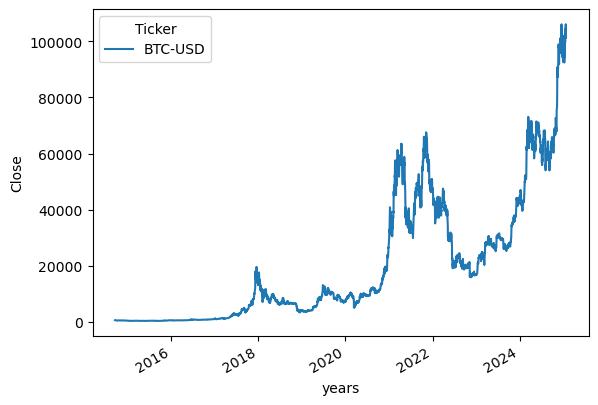

In [10]:
plt.figure(figsize=(16,6))
bitcoin['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.show()

In [11]:
def plot_graph(value,column):
    plt.figure(figsize=(16,6))
    value[column].plot()
    plt.title(column)
    plt.xlabel("years")
    plt.ylabel(column)
    plt.show()

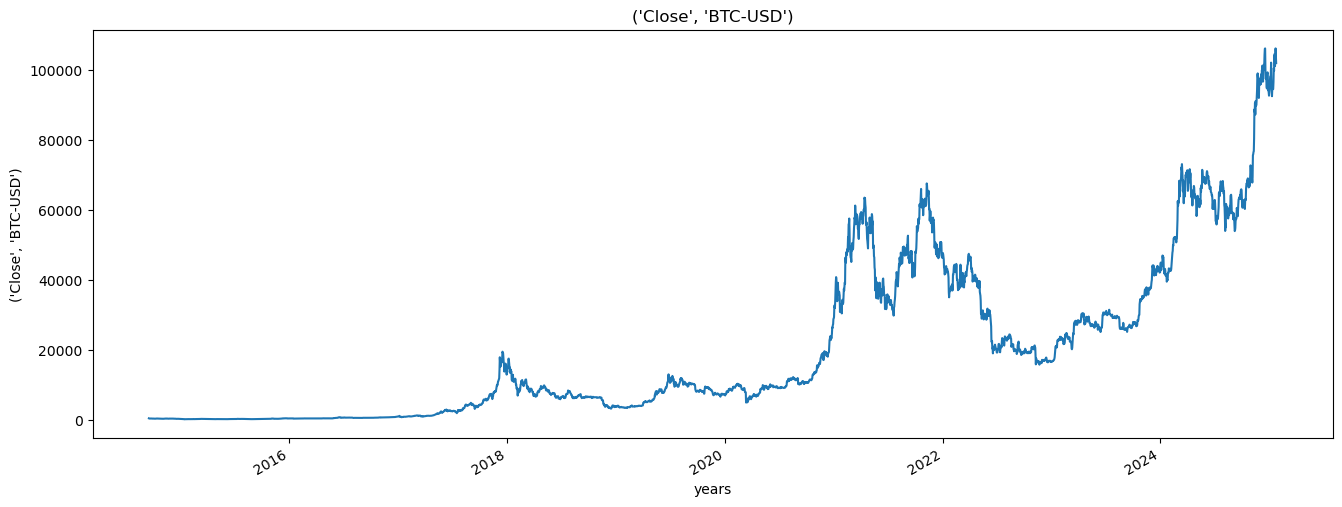

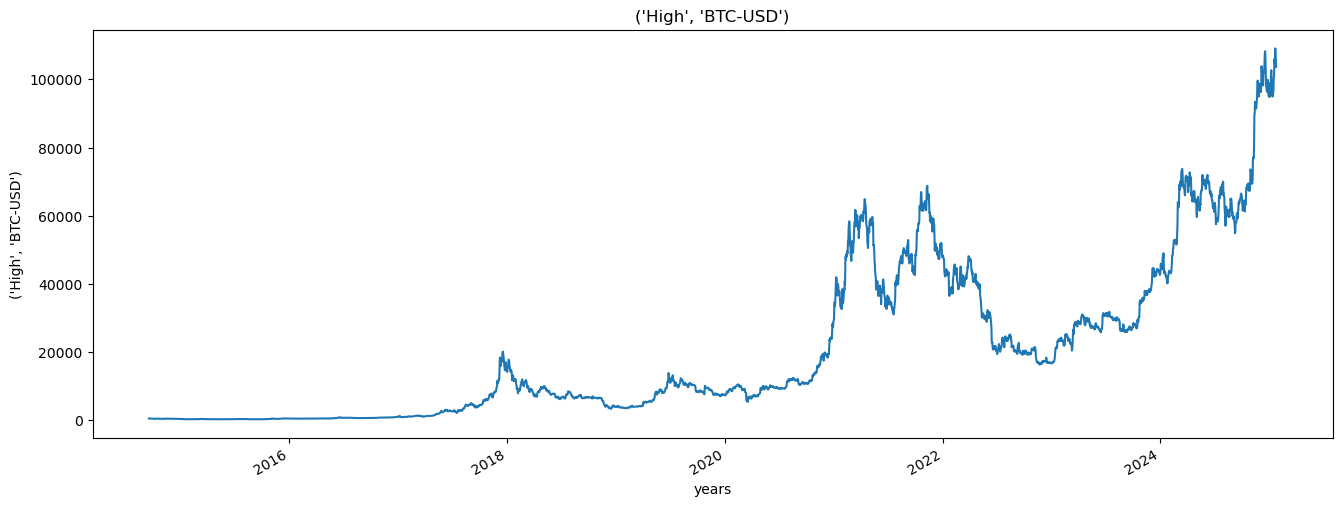

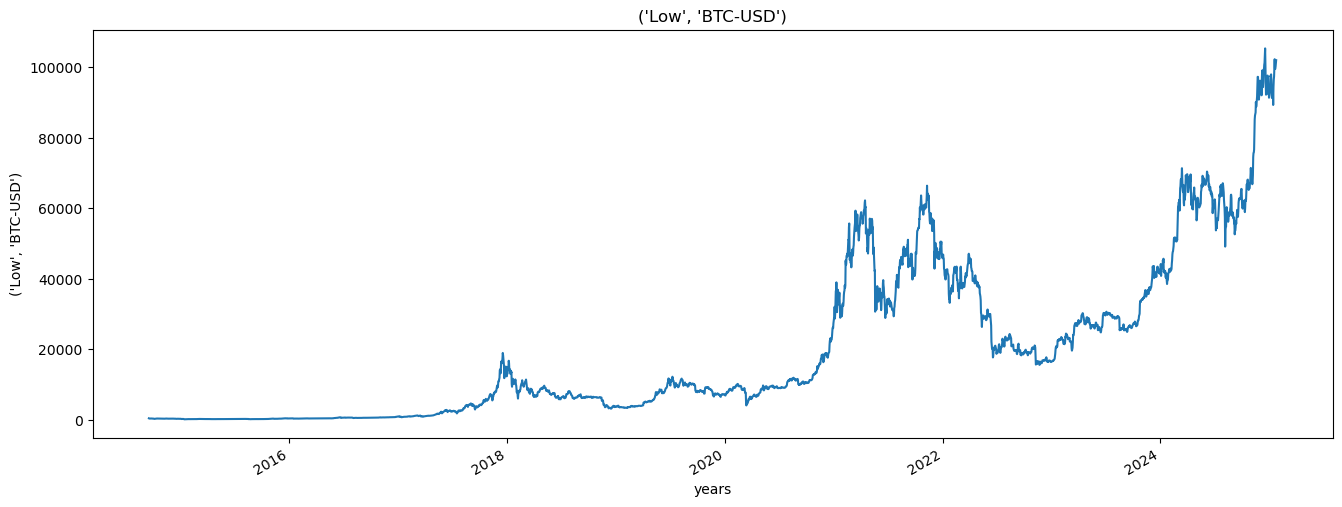

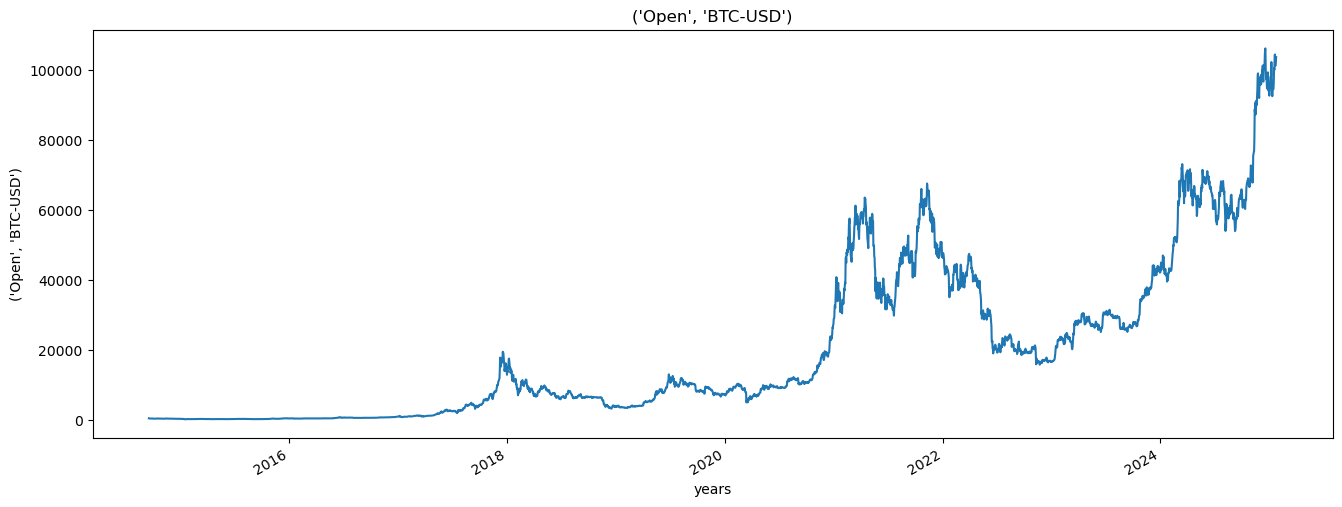

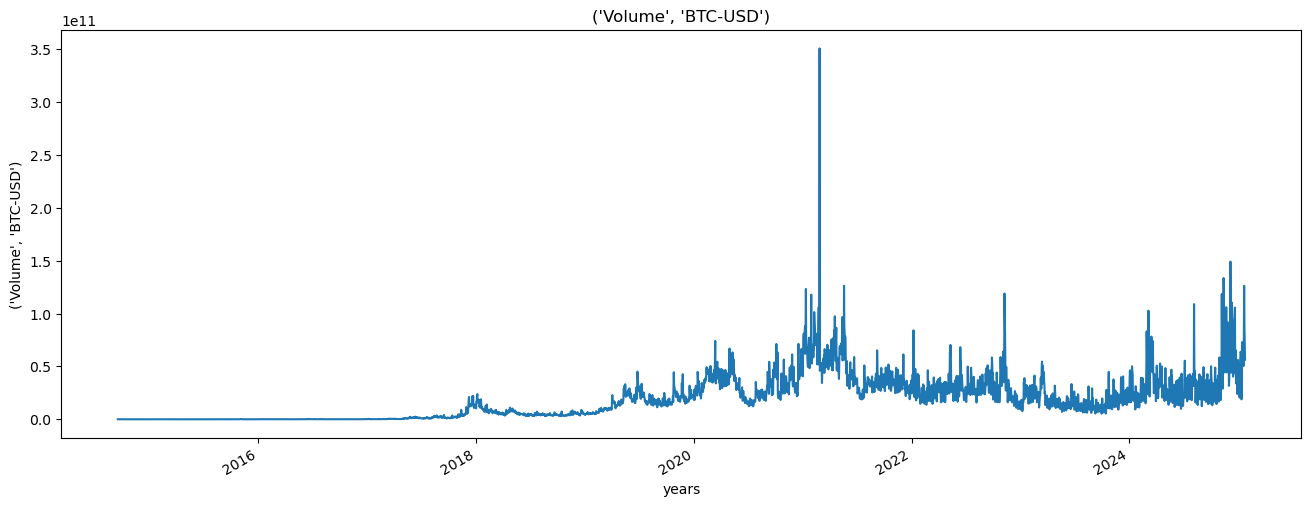

In [12]:
for column in bitcoin.columns:
    plot_graph(bitcoin, column)

In [13]:
for i in range(2014,2025):
    print(i,list(bitcoin.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


Moving Average

In [14]:
bitcoin['ma_for_100']=bitcoin['Close'].rolling(100).mean()

In [15]:
bitcoin['ma_for_100']

Date
2014-09-17             NaN
2014-09-18             NaN
2014-09-19             NaN
2014-09-20             NaN
2014-09-21             NaN
                  ...     
2025-01-18    88172.391992
2025-01-19    88558.837188
2025-01-20    88947.073594
2025-01-21    89380.022500
2025-01-23    89739.099375
Name: ma_for_100, Length: 3781, dtype: float64

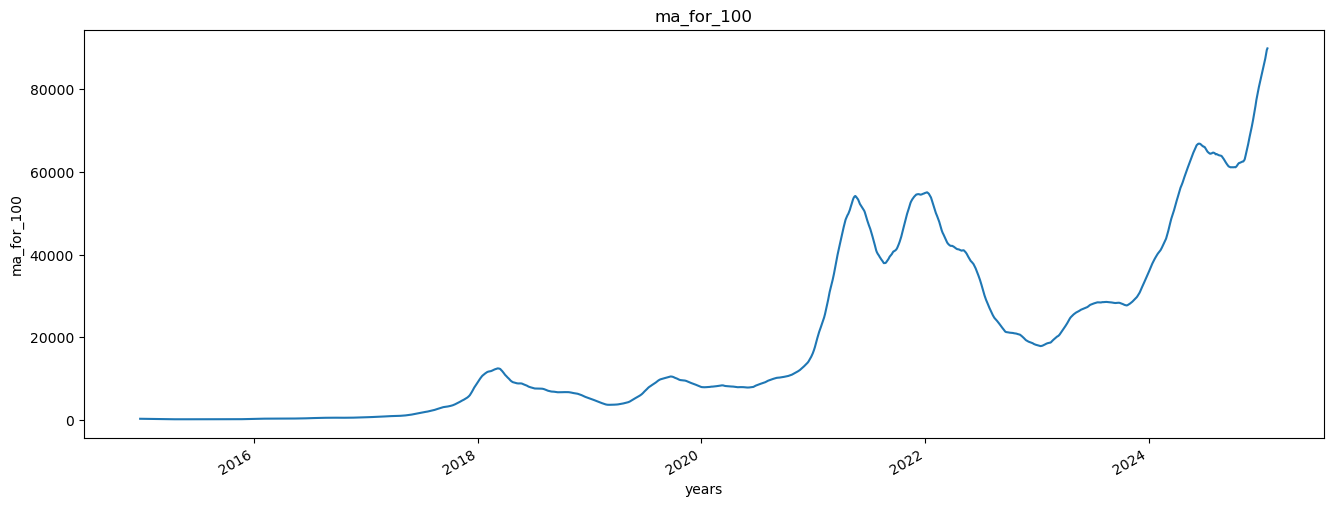

In [16]:
plot_graph(bitcoin, 'ma_for_100')

<Figure size 1600x600 with 0 Axes>

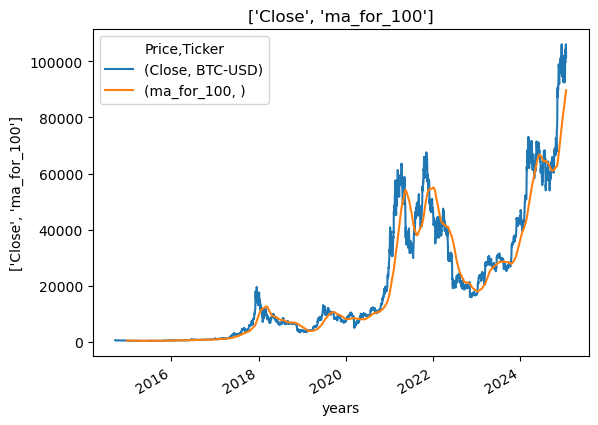

In [17]:
plot_graph(bitcoin, ['Close', 'ma_for_100'])

<Figure size 1600x600 with 0 Axes>

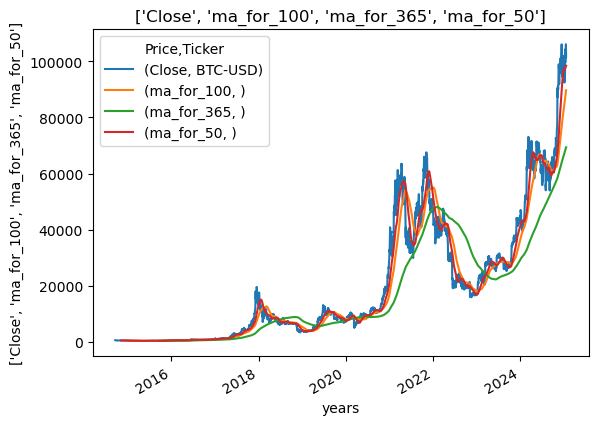

In [18]:
bitcoin['ma_for_365']=bitcoin['Close'].rolling(365).mean()
bitcoin['ma_for_50']=bitcoin['Close'].rolling(50).mean()
plot_graph(bitcoin, ['Close', 'ma_for_100','ma_for_365','ma_for_50'])

<Figure size 1600x600 with 0 Axes>

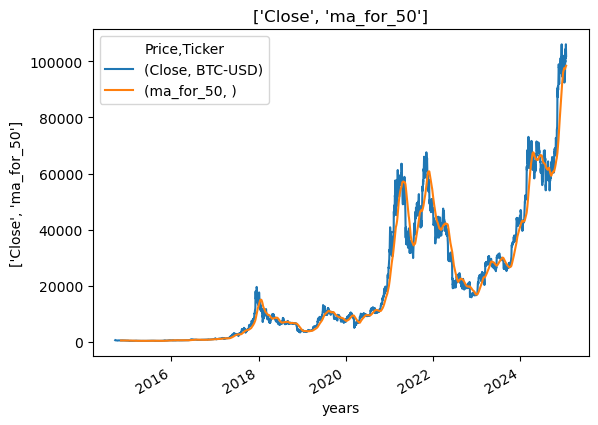

In [19]:
plot_graph(bitcoin, ['Close','ma_for_50'])

In [20]:
bitcoin['percentage']=bitcoin['Close'].pct_change()
bitcoin[['percentage','Close']].tail()

Price,percentage,Close
Ticker,,BTC-USD
Date,,
2025-01-18,-0.000517,104408.070312
2025-01-19,-0.031784,101089.609375
2025-01-20,0.009171,102016.664062
2025-01-21,0.040480,106146.265625
2025-01-23,-0.039497,101953.812500


In [21]:
# Rename columns to simpler names
bitcoin.columns = bitcoin.columns.get_level_values(0)
bitcoin['percentage'] = bitcoin['Close'].pct_change()
print(bitcoin[['percentage', 'Close']].tail())


Price       percentage          Close
Date                                 
2025-01-18   -0.000517  104408.070312
2025-01-19   -0.031784  101089.609375
2025-01-20    0.009171  102016.664062
2025-01-21    0.040480  106146.265625
2025-01-23   -0.039497  101953.812500


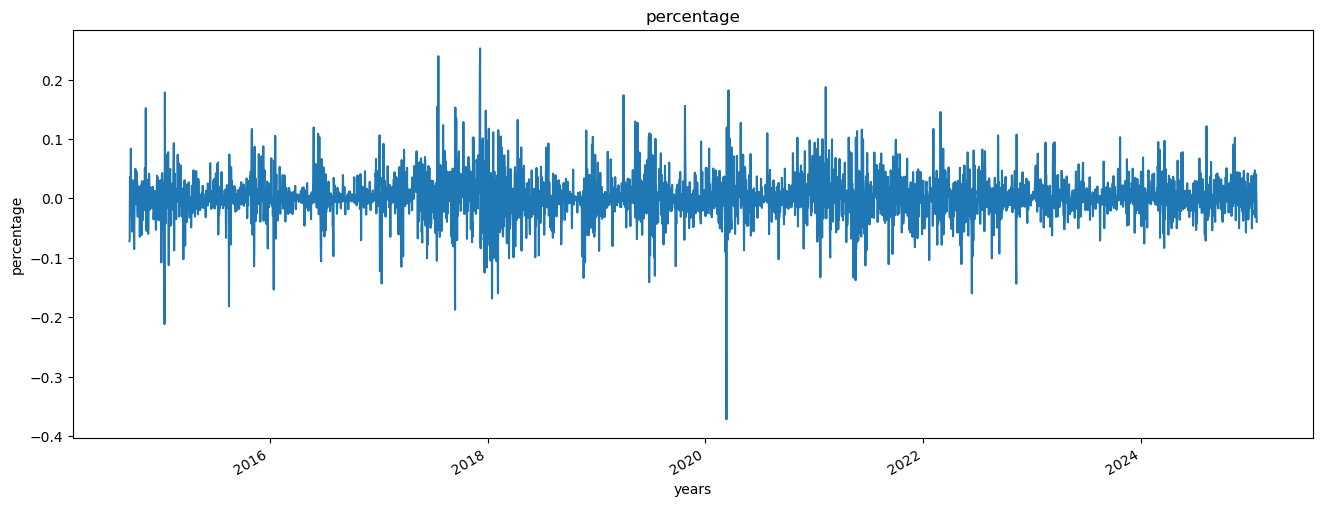

In [22]:
plot_graph(bitcoin,'percentage')

-----------

In [23]:
train=bitcoin['Close'].iloc[:int(bitcoin['Close'].size*.8)]
test=bitcoin['Close'].iloc[int(bitcoin['Close'].size*.8):]

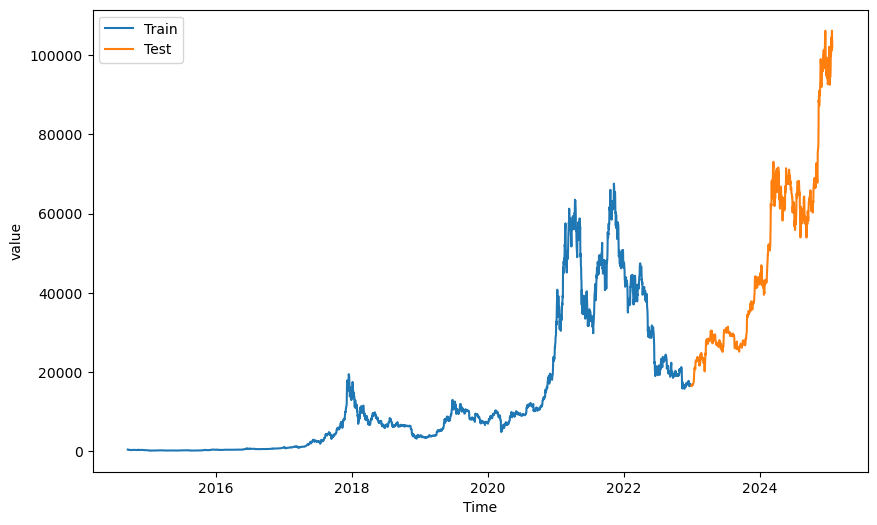

In [24]:
plt.figure(figsize=(10,6))
plt.plot(train.index,train.values,label='Train')
plt.plot(test.index,test.values,label='Test')
plt.legend()
plt.xlabel('Time')
plt.ylabel('value')
plt.show()

In [25]:
import pandas as pd

In [26]:
train.shape[0]

3024

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [28]:
train_reshaped = train.to_numpy().reshape(-1, 1)
train_scale = scaler.fit_transform(train_reshaped)

In [29]:
x=[]
y=[]
for i in range(100,train_scale.shape[0]):
    x.append(train_scale[i-100:i])
    y.append(train_scale[i,0])

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2025-01-23 09:51:18.383540: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-23 09:51:18.404804: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 09:51:18.669660: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 09:51:19.045205: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-23 09:51:19.190007: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [31]:
x,y=np.array(x),np.array(y)

In [32]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))




/home/lenovo/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=60, batch_size=32,verbose=1)

Epoch 1/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 0.0318
Epoch 2/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0049
Epoch 3/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0046
Epoch 4/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.0043
Epoch 5/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0034
Epoch 6/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 0.0034
Epoch 7/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 0.0037
Epoch 8/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 0.0036
Epoch 9/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.0032
Epoch 10/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.0036
Epoch 11/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.0028
Epoch 12/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0031
Epoch 13/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0030
Epoch 14/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 0.0022
Epoch 15/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.00

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [35]:
pas_100=train.tail(100)

In [36]:
data_test=pd.concat([pas_100,test],ignore_index=True)

In [37]:
data_test

0       19544.128906
1       18890.789062
2       18547.400391
3       19413.550781
4       19297.638672
           ...      
852    104408.070312
853    101089.609375
854    102016.664062
855    106146.265625
856    101953.812500
Name: Close, Length: 857, dtype: float64

In [38]:
test_reshaped = data_test.to_numpy().reshape(-1, 1)
test_reshaped_scale = scaler.fit_transform(test_reshaped)

In [39]:
x=[]
y=[]
for i in range(100,train_scale.shape[0]):
    x.append(train_scale[i-100:i])
    y.append(train_scale[i,0])
x,y=np.array(x),np.array(y)

In [40]:
y_pre=model.predict(x)

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


In [41]:
y_pre

array([[0.03397352],
       [0.03395389],
       [0.03393449],
       ...,
       [0.24404496],
       [0.2445661 ],
       [0.24532135]], dtype=float32)

In [42]:
v=1/scaler.scale_

In [43]:
y_pre=y_pre*v

In [44]:
y_pre

array([[ 3069.81221456],
       [ 3068.03893498],
       [ 3066.2858522 ],
       ...,
       [22051.65397136],
       [22098.74349828],
       [22166.98716004]])

In [45]:
y=y*v

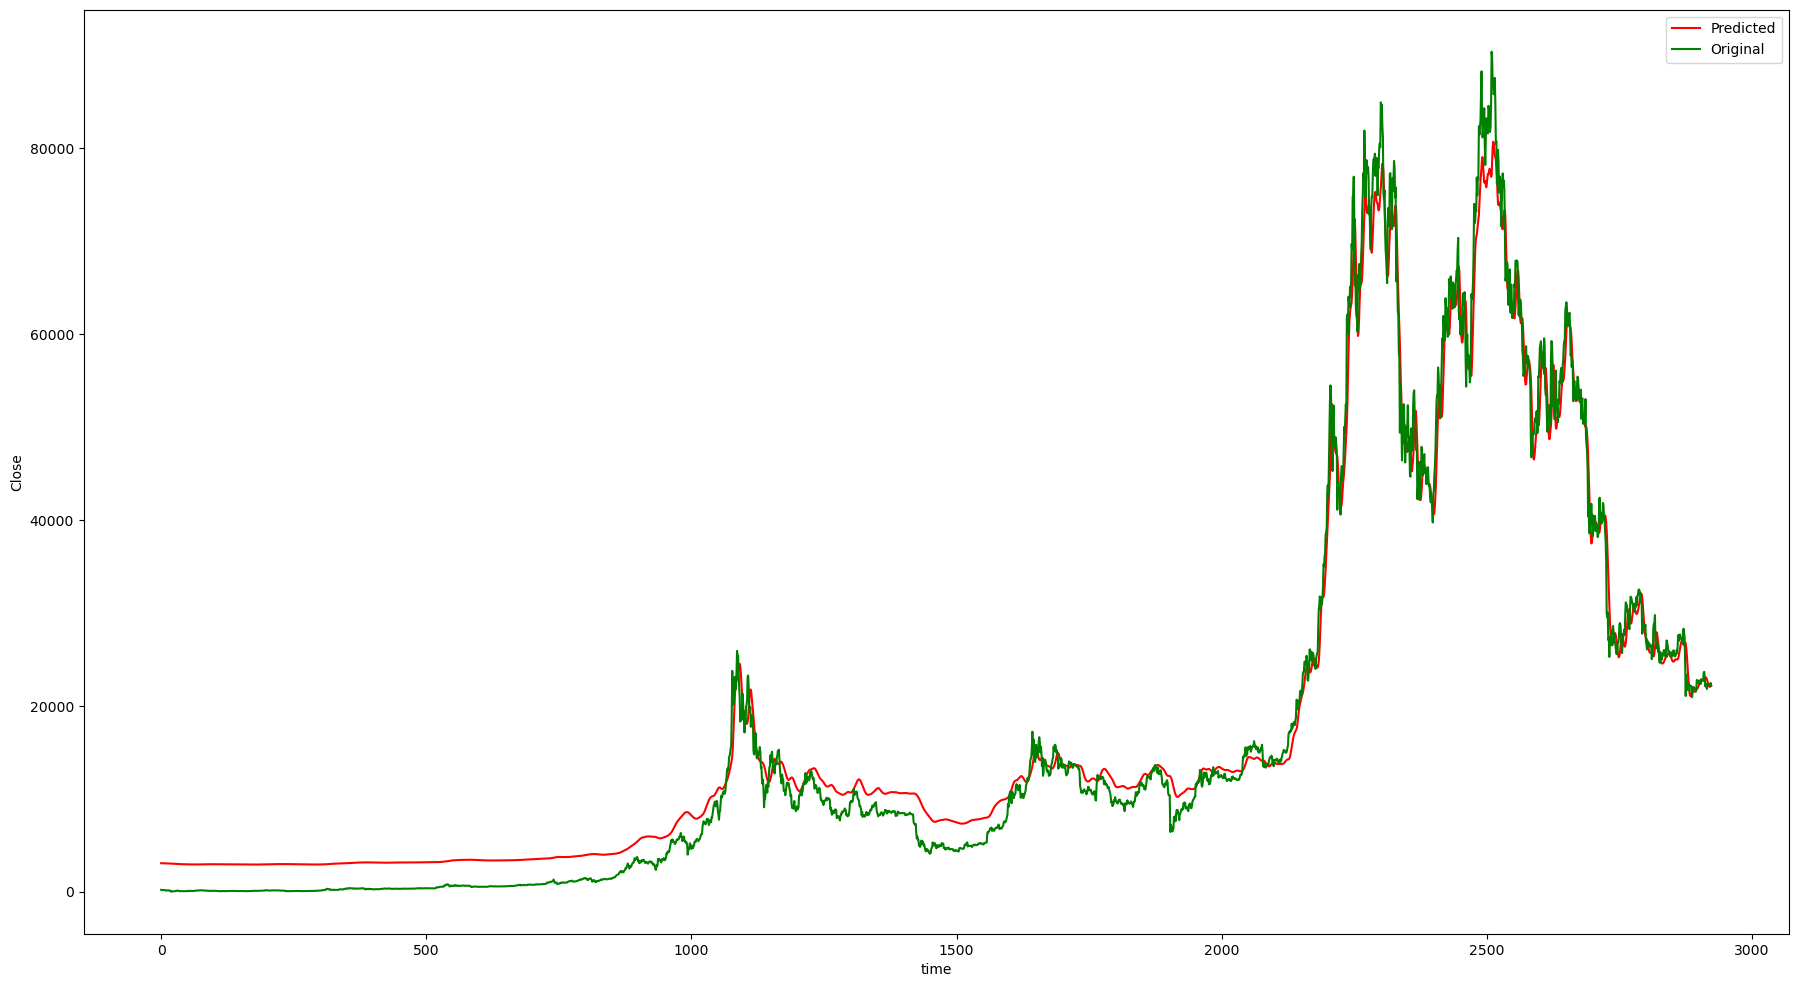

In [46]:
plt.figure(figsize=(22,12))
plt.plot(y_pre,'r',label='Predicted')
plt.plot(y,'g',label='Original')
plt.xlabel("time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [47]:
last_100_days = bitcoin['Close'].tail(100).to_numpy().reshape(-1, 1)
scaled_data = scaler.transform(last_100_days)
predicted_prices = []
current_input = scaled_data

for _ in range(31):
    x_input = current_input.reshape((1, current_input.shape[0], 1))
    scaled_prediction = model.predict(x_input)
    actual_prediction = scaler.inverse_transform(scaled_prediction)
    predicted_prices.append(actual_prediction[0][0])
    
    # Update the input: remove the first element, append the new prediction
    current_input = np.append(current_input[1:], scaled_prediction).reshape(-1, 1)

prediction_dates = pd.date_range(start='2025-01-21', end='2025-02-20')
predicted_prices_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Price': predicted_prices})

print(predicted_prices_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [48]:
x1=prediction_dates
x2=predicted_prices

In [49]:
predicted_prices_df.columns = predicted_prices_df.columns.get_level_values(0)
predicted_prices_df['percentage'] = predicted_prices_df['Predicted_Price'].pct_change()
print(predicted_prices_df[['percentage', 'Predicted_Price']].tail(10))


    percentage  Predicted_Price
21   -0.004378     79229.273438
22   -0.004164     78899.359375
23   -0.003975     78585.757812
24   -0.003820     78285.562500
25   -0.003688     77996.820312
26   -0.003580     77717.609375
27   -0.003494     77446.062500
28   -0.003428     77180.578125
29   -0.003380     76919.742188
30   -0.003345     76662.414062


In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pre)
print(f"R^2 Score: {r2}")


R^2 Score: 0.985150803593182


it's a good value